In [ ]:
# import pandas as pd
# follower = pd.read_csv('./follower.csv', header = None, engine ='python')
# follower.columns = ['user', 'follower']

In [2]:
import pandas as pd
import numpy as np

users_info = pd.read_csv('./users_info.csv', header = None, delimiter = ',', engine ='python', encoding='utf-8')
users_info = users_info.reset_index()

users_info.columns = ['name', 'address', 'education', 'company', 'job', 'headline', 'user_id', 
                      'answer','question', 'article', 'favorite', 'agree', 'thanked', 'following',
                      'followers','topic', 'columns', 'sex', 'updatetime', 'weibo', 'token', 
                      'index_url','dump']
users_info.drop(columns = ['updatetime', 'token', 'dump'], inplace = True)
users_info.dropna(subset= ['user_id', "index_url"], how='any', inplace = True)

users_info.loc[users_info["headline"].isna() == False, "headline"] = 1
users_info.loc[users_info["weibo"].isna() == False, "weibo"] = 1
users_info.update(users_info[['headline','answer', 'question', 'article', 'favorite', 'agree', 'thanked', 'following', 
                      'followers', 'topic', 'columns', 'weibo']].fillna(0))

users_info['address'] = users_info['address'].str.replace('市','')
users_info['sex'] = users_info['sex'].str.replace('女','0')
users_info['sex'] = users_info['sex'].str.replace('男','1')

users_info[['answer','question', 'article', 'favorite', 'agree', 'thanked', 'following','followers','topic']] = \
users_info[['answer','question', 'article', 'favorite', 'agree', 'thanked', 'following','followers','topic']].astype(np. int64)
users_info[['headline', 'columns', 'sex', 'weibo']] = users_info[['headline', 'columns', 'sex', 'weibo']].apply(pd.to_numeric)

users_info.drop(columns = ['address', 'education', 'company', 'job', 'index_url'], inplace = True)
users_info.set_index('user_id', inplace=True)

In [30]:
users_info['address'].value_counts().head(5)

0    329216
1     91733
Name: weibo, dtype: int64

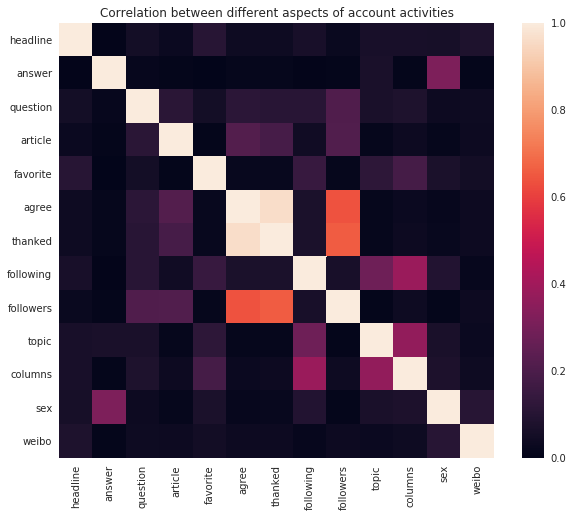

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

f, ax = plt.subplots(figsize=(10, 8))
corr = users_info.corr()
sns_corr = sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), square=True, ax=ax).\
    set_title('Correlation between different aspects of account activities')
fig = sns_corr.get_figure()
fig.savefig("corr.png")

In [48]:
users_info.corr()

,headline,answer,question,article,favorite,agree,thanked,following,followers,topic,columns,sex,weibo
headline,1.000000,0.007069,0.050166,0.027592,0.104683,0.035368,0.036145,0.063054,0.023301,0.062965,0.062504,0.059648,0.077636
answer,0.007069,1.000000,0.017870,0.007139,-0.000693,0.011082,0.012663,0.006213,0.007497,0.067946,0.008223,0.317301,0.010701
question,0.050166,0.017870,1.000000,0.111167,0.053464,0.112672,0.108385,0.105989,0.207824,0.069206,0.078586,0.031045,0.037054
article,0.027592,0.007139,0.111167,1.000000,0.009742,0.216272,0.185407,0.042791,0.211181,0.011130,0.033406,0.012496,0.030839
favorite,0.104683,-0.000693,0.053464,0.009742,1.000000,0.019385,0.022499,0.146775,0.014154,0.118495,0.179394,0.070163,0.046808
agree,0.035368,0.011082,0.112672,0.216272,0.019385,1.000000,0.962783,0.071000,0.638239,0.011662,0.030571,0.018384,0.031261
thanked,0.036145,0.012663,0.108385,0.185407,0.022499,0.962783,1.000000,0.071152,0.657633,0.014661,0.031550,0.019969,0.032737
following,0.063054,0.006213,0.105989,0.042791,0.146775,0.071000,0.071152,1.000000,0.064174,0.282933,0.384777,0.091206,0.015597
followers,0.023301,0.007497,0.207824,0.211181,0.014154,0.638239,0.657633,0.064174,1.000000,0.010848,0.034765,0.010742,0.031062
topic,0.062965,0.067946,0.069206,0.011130,0.118495,0.011662,0.014661,0.282933,0.010848,1.000000,0.363862,0.066710,0.029325


/software/Anaconda3-5.1.0-el7-x86_64/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


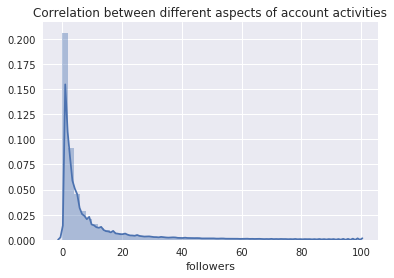

In [20]:
import seaborn as sns
import numpy as np
from scipy import stats, integrate
%matplotlib inline

sns.set(color_codes=True)
sns_dist_followers = sns.distplot(users_info['followers'][users_info['followers'] <100]).\
    set_title('Distribution of following')
fig = sns_dist_followers.get_figure()
fig.savefig("sns_dist_followers.png")

/software/Anaconda3-5.1.0-el7-x86_64/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


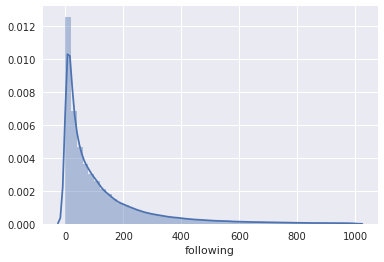

In [22]:
sns.distplot(users_info['following'][users_info['following'] < 1000])

/software/Anaconda3-5.1.0-el7-x86_64/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


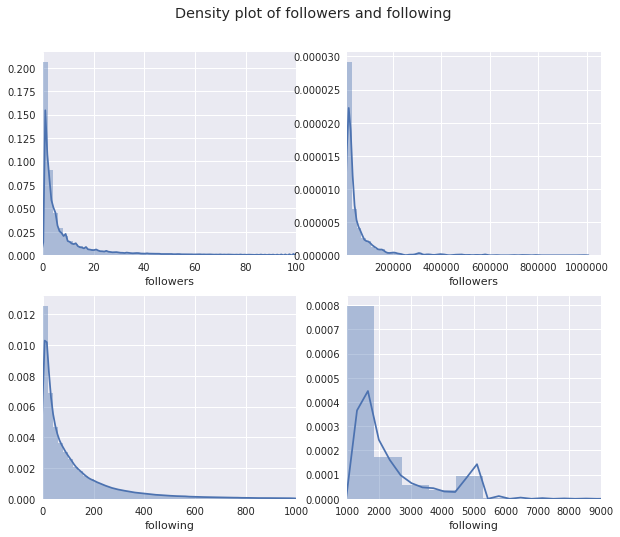

In [58]:
fix, axes = plt.subplots(2,2, figsize=(10,8))

sns.distplot(users_info['followers'][users_info['followers'] < 100], ax = axes[0,0])
axes[0,0].set_xlim(0, 100)
sns.distplot(users_info['followers'][users_info['followers'] > 10000], ax = axes[0,1])
axes[0,1].set_xlim(10000)
sns.distplot(users_info['following'][users_info['following'] < 1000], ax = axes[1,0])
axes[1,0].set_xlim(0, 1000)
sns.distplot(users_info['following'][users_info['following'] > 1000], ax = axes[1,1])
axes[1,1].set_xlim(1000, 9000)

plt.subplots_adjust(top = 0.9)
fix.suptitle('Density plot of followers and following') 
plt.show()

In [45]:
users_info.describe()

,headline,answer,question,article,favorite,agree,thanked,following,followers,topic,columns,sex,weibo
count,420949.000000,420949.000000,420949.000000,420949.000000,420949.000000,4.209490e+05,420949.000000,420949.000000,420949.000000,420949.000000,420949.000000,420949.000000,420949.000000
mean,0.605981,28.134161,1.961793,0.256884,4.718861,4.128856e+02,90.223823,156.428814,212.132660,45.994265,11.448947,0.833863,0.217920
std,0.488640,2593.264512,16.332524,6.098957,7.372886,7.556247e+03,1618.468812,337.841412,5781.427943,134.427720,33.053896,0.466400,0.412833
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,20.000000,1.000000,8.000000,0.000000,1.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000e+00,0.000000,67.000000,3.000000,21.000000,3.000000,1.000000,0.000000
75%,1.000000,8.000000,1.000000,0.000000,6.000000,1.200000e+01,4.000000,172.000000,11.000000,47.000000,11.000000,1.000000,0.000000
max,1.000000,669118.000000,3181.000000,1344.000000,239.000000,1.218509e+06,304153.000000,43932.000000,981917.000000,22122.000000,4042.000000,171.000000,1.000000


In [4]:
users_info.sort_values(by = ['followers'],ascending = False).head(10)

,name,headline,answer,question,article,favorite,agree,thanked,following,followers,topic,columns,sex,weibo
user_id,,,,,,,,,,,,,,
430741,李开复,0,107,6,1,0,96117,22401,201,981917,28,0,0,1
339335,黄继新,1,782,1334,95,44,75274,20039,9608,789897,135,635,1,1
392321,周源,1,341,612,8,7,42553,10132,1876,752113,160,154,1,0
675267,yolfilm,1,1509,106,2,10,835981,198641,226,732463,134,59,1,1
337598,张亮,1,1407,1711,98,4,187148,39908,2218,697974,104,88,1,1
392163,李淼,0,1157,47,121,5,347455,67016,756,623385,196,55,1,1
420717,采铜,1,981,101,75,11,569696,134148,1050,580736,26,94,1,1
384961,葛巾,1,34,1,14,0,168827,47313,312,580650,11,6,1,1
367420,朱炫,1,196,4,47,2,1128626,245011,204,579459,37,12,1,1


In [3]:
import csv
import numpy as np
import pandas as pd

result = []
with open('./label_test.txt', 'r', encoding = "utf-8") as f:
    reader = csv.reader(f)
    for row in reader:
        temp = row[0].split('(')
for t in temp[1:]:
    result += [t.split(')')[1].strip()]

In [4]:
users_info['label'] = 0
           
for i in range(len(result)):
    temp = users_info[users_info['name'] == result[i]]
    if len(temp) == 0:
        continue
    if len(temp) == 1:
        get = users_info[users_info['name'] == result[i]].index
    if len(temp) > 1:
        get = temp.sort_values(by = ['agree'],ascending = False).index[0]
    users_info.loc[get, 'label'] = 1

In [7]:
users_info.sort_values(by = ['followers'],ascending = False).head()

,name,headline,answer,question,article,favorite,agree,thanked,following,followers,topic,columns,sex,weibo,label
user_id,,,,,,,,,,,,,,,
430741,李开复,0,107,6,1,0,96117,22401,201,981917,28,0,0,1,1
339335,黄继新,1,782,1334,95,44,75274,20039,9608,789897,135,635,1,1,1
392321,周源,1,341,612,8,7,42553,10132,1876,752113,160,154,1,0,1
675267,yolfilm,1,1509,106,2,10,835981,198641,226,732463,134,59,1,1,1
337598,张亮,1,1407,1711,98,4,187148,39908,2218,697974,104,88,1,1,1


In [10]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

users_info['is_train'] = np.random.uniform(0, 1, len(users_info)) <= .75
train, test = users_info[users_info['is_train']==True], users_info[users_info['is_train']==False]

features = users_info.columns[1:-2]
y = pd.factorize(train['label'])[0]

clf = RandomForestClassifier(random_state= 515)
clf.fit(train[features], y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=515, verbose=0, warm_start=False)

In [11]:
preds = clf.predict(test[features])
pd.crosstab(test['label'], preds, rownames=['Actual label'], colnames=['Predicted label'])

Predicted label,0,1
Actual label,,
0,104384,16
1,81,87


In [12]:
list(zip(train[features], clf.feature_importances_))

[('headline', 0.007914121087131767),
 ('answer', 0.09379858876140724),
 ('question', 0.03803430866774436),
 ('article', 0.05372841940936458),
 ('favorite', 0.03540355436081758),
 ('agree', 0.2458276718952213),
 ('thanked', 0.206438409001564),
 ('following', 0.06284041613472212),
 ('followers', 0.14998015633770043),
 ('topic', 0.053743765109038034),
 ('columns', 0.0437919576510443),
 ('sex', 0.0008139945087197358),
 ('weibo', 0.007684637075524535)]

In [13]:
scores = cross_val_score(clf, train[features], pd.factorize(train['label'])[0], cv=10)
print('Scores =', np.mean(scores))

Scores = 0.9991466004610275


In [14]:
sample_weight = np.array([1000 if i == 1 else 1 for i in y])
clf = RandomForestClassifier(class_weight={0:1, 1:10000000}, random_state= 515)
clf.fit(train[features], y)

RandomForestClassifier(bootstrap=True, class_weight={0: 1, 1: 10000000},
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=515,
            verbose=0, warm_start=False)

In [15]:
preds = clf.predict(test[features])
pd.crosstab(test['label'], preds, rownames=['Actual label'], colnames=['Predicted label'])

Predicted label,0,1
Actual label,,
0,104355,45
1,61,107


In [16]:
list(zip(train[features], clf.feature_importances_))

[('headline', 0.005670961379594788),
 ('answer', 0.07252017377547745),
 ('question', 0.06804940875111155),
 ('article', 0.005531717012397462),
 ('favorite', 0.11566758642920968),
 ('agree', 0.05840255819478417),
 ('thanked', 0.03294142917754948),
 ('following', 0.23700877160947548),
 ('followers', 0.08483787981502142),
 ('topic', 0.15636363939172127),
 ('columns', 0.11245455108930824),
 ('sex', 0.01571353495973991),
 ('weibo', 0.03483778841460898)]

In [17]:
scores = cross_val_score(clf, train[features], pd.factorize(train['label'])[0], cv=10)
print('Scores =', np.mean(scores))

Scores = 0.9990454572663492


In [18]:
from sklearn.model_selection import GridSearchCV
param_test = {'max_depth':range(1,6), 'min_samples_split':range(2,6),'min_samples_leaf':range(1,6,1)}
gsearch = GridSearchCV(estimator = RandomForestClassifier(random_state = 515), param_grid = param_test, scoring='roc_auc',cv=5)
gsearch.fit(train[features], y)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=515, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': range(1, 6), 'min_samples_split': range(2, 6), 'min_samples_leaf': range(1, 6)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [19]:
gsearch.best_params_

{'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}

In [29]:
clf = RandomForestClassifier(max_depth=5,min_samples_split=2, min_samples_leaf=2, random_state = 515)

In [30]:
clf.fit(train[features], y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=515, verbose=0, warm_start=False)

In [31]:
preds = clf.predict(test[features])
pd.crosstab(test['label'], preds, rownames=['Actual label'], colnames=['Predicted label'])

Predicted label,0,1
Actual label,,
0,104382,18
1,75,93


In [32]:
list(zip(train[features], clf.feature_importances_))

[('headline', 0.0),
 ('answer', 0.09497535467470955),
 ('question', 0.013644706433880733),
 ('article', 0.05976656501097436),
 ('favorite', 0.004750309344517927),
 ('agree', 0.3991768802085714),
 ('thanked', 0.24543200331393455),
 ('following', 0.009302033444958557),
 ('followers', 0.15563365588862316),
 ('topic', 0.008758532844917793),
 ('columns', 0.007658725564628893),
 ('sex', 0.0002681387750208856),
 ('weibo', 0.0006330944952621808)]

In [33]:
scores = cross_val_score(clf, train[features], pd.factorize(train['label'])[0], cv=10)
print('Scores =', np.mean(scores))

Scores = 0.9992034941698982


In [42]:
clf = RandomForestClassifier(class_weight={0:1, 1:4}, max_depth=5,min_samples_split=2, min_samples_leaf=2, random_state = 515)
clf.fit(train[features], y)

RandomForestClassifier(bootstrap=True, class_weight={0: 1, 1: 4},
            criterion='gini', max_depth=5, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=2,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=515,
            verbose=0, warm_start=False)

In [43]:
preds = clf.predict(test[features])
pd.crosstab(test['label'], preds, rownames=['Actual label'], colnames=['Predicted label'])

Predicted label,0,1
Actual label,,
0,104354,46
1,45,123


In [36]:
list(zip(train[features], clf.feature_importances_))

[('headline', 0.0),
 ('answer', 0.07203906562167758),
 ('question', 0.011242787718229424),
 ('article', 0.07009065190232293),
 ('favorite', 0.002448495155839994),
 ('agree', 0.3965585123374243),
 ('thanked', 0.2603108674108291),
 ('following', 0.00440783265573911),
 ('followers', 0.17463278640958307),
 ('topic', 0.003057715540069708),
 ('columns', 0.004856989559660019),
 ('sex', 4.560437483246264e-06),
 ('weibo', 0.0003497352511414846)]

In [37]:
scores = cross_val_score(clf, train[features], pd.factorize(train['label'])[0], cv=10)
print('Scores =', np.mean(scores))

Scores = 0.9990644221023931
